In [10]:
import numpy as np
from xgboost import XGBClassifier  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("data/data_moods.csv")

In [12]:
col_features = df.columns[7:-3]
# X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']
X2

array([[ 8.66000e-01,  1.37000e-01,  7.30000e-01, ..., -8.20100e+00,
         7.67000e-02,  1.18523e+02],
       [ 3.81000e-01,  1.89000e-02,  8.32000e-01, ..., -5.06900e+00,
         4.92000e-02,  1.20255e+02],
       [ 3.46000e-01,  9.13000e-01,  1.39000e-01, ..., -1.53260e+01,
         3.21000e-02,  1.36168e+02],
       ...,
       [ 6.42000e-01,  7.86000e-01,  3.74000e-01, ..., -9.38600e+00,
         5.45000e-02,  1.24099e+02],
       [ 5.61000e-01,  9.13000e-01,  8.48000e-02, ..., -1.50990e+01,
         4.04000e-02,  1.02128e+02],
       [ 3.77000e-01,  9.94000e-01,  1.56000e-02, ..., -2.84350e+01,
         3.97000e-02,  1.40179e+02]])

In [13]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

# dummy_y = np_utils.to_categorical(encoded_y)

x_train,x_test,y_train,y_test = train_test_split(X2,encoded_y,test_size=0.2,random_state=20)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [14]:
model = XGBClassifier()  
model.fit(x_train,y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [15]:
y_pred = model.predict(x_test)

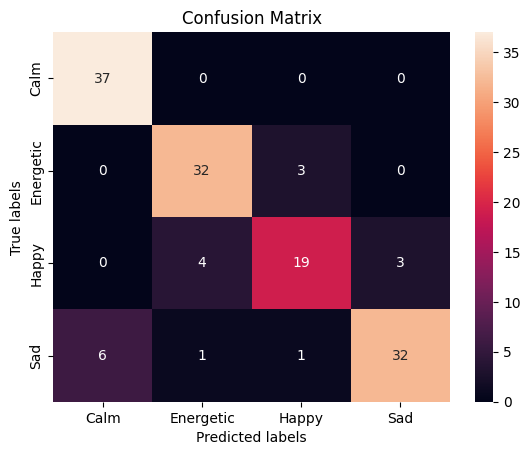

Accuracy: 86.96%


In [16]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

accuracy1 = accuracy_score(y_test,y_pred)  
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))  

In [74]:
import joblib
joblib.dump(model,"xg_model.pkl")

['xg_model.pkl']